In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import IPython.display as display
import math

In [2]:

def gaussian_show(std,kernel_size,image_path):
  """

    gaussian blurring is helpful in denoising images and in reducing noise

  """
  image = cv2.imread(image_path)
  # image = cv2.resize(image, (201, 256))  # (width, height)
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  blur = cv2.GaussianBlur(rgb_image, (kernel_size, kernel_size), std)
  return blur



In [3]:
def color_mask(frame):
    """Applies a color mask to isolate white and yellow lanes.
    so any pixel in that range provided will result in a white pixel in the final image
    """

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # middle value in hsv is for saturation and the right most is brightness
    # Define color range for yellow and white
    # higher the saturation more is the colourfulness of the image
    # hue (H) is for color and for white it doesnt matter anything from (0 to 180 is okay)
    yellow_mask = cv2.inRange(hsv, np.array([18, 94, 140]), np.array([48, 255, 255]))
# 185 and 40 are changeable
    white_mask = cv2.inRange(hsv, np.array([0, 0, 185]), np.array([180, 40, 255]))

    combined_mask = cv2.bitwise_or(yellow_mask, white_mask)

    final_mask = cv2.bitwise_and(frame, frame, mask=combined_mask)

    # plt.imshow(final_mask)
    return final_mask


In [29]:
def canny_edge_detection(frame,min,max):
    """Applies Canny Edge Detection.
    if gradient change of color is greater than the max then it is considered as a edge and if it is lesser than but connected to a edge it is treated as edge but its value is greater than the minimum threshold
    """
    gray = frame[:,:,2]
    edges = cv2.Canny(gray, min, max)
    print(edges.shape)
    # plt.imshow(edges,cmap = "gray")
    return edges

In [33]:
def region_of_interest(edges):
    """Isolates the region of interest (ROI)."""
    height, width = edges.shape
    # Define polygon mask
    mask = np.zeros_like(edges)
    polygon = np.array([[
        (int(0 * width), height),
        (int(0.9 * width), height),
        (int(0.8 * width), int( 0.2*height)),
        (int(0.2* width), int(0.2* height))
    ]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    # plt.imshow(cv2.bitwise_and(edges, mask),cmap="gray")
    print(cv2.bitwise_and(edges, mask).shape)
    return cv2.bitwise_and(edges, mask)

In [36]:
def detect_hough_lines(edges,threshold):
    """Detects lines using the Hough Transform."""
    ## the second parameter 1 corresponds to the resolution of 1 pixel which is the perpendicular distance of the line from the origin
    # the third parameter is the angle parameter which is incremented by 1degree resolution
    # these parameters make the accumulator more coasrse or less coarse accordingly
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=threshold, minLineLength=75, maxLineGap=100)
    ### output of the lines is in the format of (x1,y1),(x2,y2)
    return lines

In [37]:
def draw_lines(frame,lines):
    """Draws lines on the frame."""
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(frame,(x1,y1),(x2,y2),(0,255,0),2)
    print(frame.shape)
    plt.imshow(frame)
    return frame[:,:,::-1]

In [41]:
def road_lanes_detector(image_path,std,kernel_size,min,max,threshold):

  blur = gaussian_show(std,kernel_size,image_path)
  blur = color_mask(blur)
  edge_detected_image = canny_edge_detection(blur,min,max)
  roi = region_of_interest(edge_detected_image)
  final_lines  = detect_hough_lines(roi,threshold)
  print(final_lines)
  return draw_lines(cv2.imread(image_path,1),final_lines),final_lines



In [24]:
img_path = "roadTest1.jpg"

(6000, 4000)
(6000, 4000)
[[[2130 4095 2142 4427]]

 [[2041 4291 2071 3702]]

 [[2588 3363 3410 3729]]

 ...

 [[1760 1954 1892 1954]]

 [[2088 3354 2096 3211]]

 [[2126 4326 2131 4413]]]
(6000, 4000, 3)


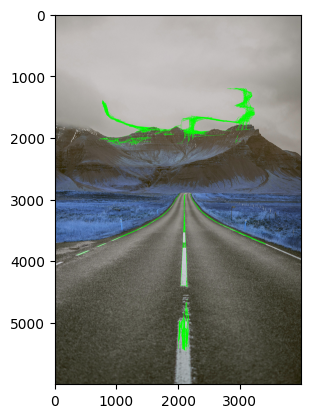

In [42]:
#image_path="/content/scenic-mountain-road-in-texas-near-big-bend-national-park.webp"
lane_with_detections = road_lanes_detector(img_path,1,5,50,200,25)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

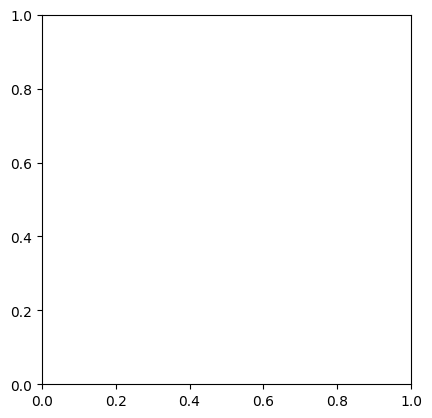

In [26]:
# rgb_img = cv2.cvtColor(lane_with_detections.astype(np.uint8), cv2.COLOR_HSV2RGB)

plt.imshow(lane_with_detections)

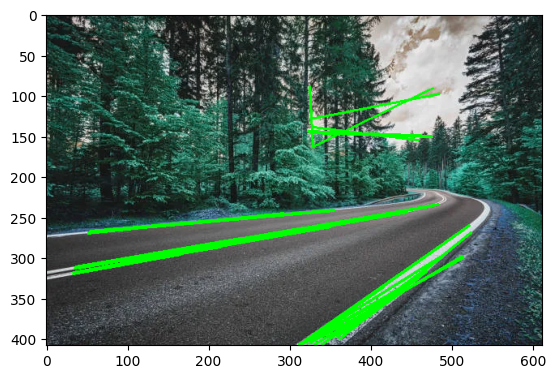

In [ ]:
image_path="/content/panoramic-mountain-road.webp"
lane_with_detections,final_lines = road_lanes_detector(image_path,1,5,50,200,25)

In [ ]:
final_lines

array([[[ 248, 1280,  353, 1007]],

       [[ 258, 1272,  309, 1065]],

       [[ 579,  625,  579,  265]],

       ...,

       [[ 511,  443,  559,  276]],

       [[ 372,  533,  420,  259]],

       [[ 141,  578,  186,  367]]], dtype=int32)

In [ ]:
lane_with_detections

array([[[ 18,  20,  15],
        [ 24,  26,  23],
        [ 26,  26,  26],
        ...,
        [ 73,  63,  64],
        [ 47,  29,  27],
        [ 42,  23,  19]],

       [[  7,   9,   4],
        [ 20,  22,  19],
        [ 39,  39,  41],
        ...,
        [ 49,  37,  39],
        [ 71,  53,  51],
        [ 37,  18,  14]],

       [[  9,  11,   8],
        [ 22,  24,  21],
        [ 33,  33,  35],
        ...,
        [ 31,  19,  19],
        [ 90,  72,  70],
        [ 77,  58,  54]],

       ...,

       [[100,  95, 101],
        [ 89,  84,  90],
        [ 98,  93, 100],
        ...,
        [148, 139, 140],
        [137, 131, 133],
        [126, 120, 120]],

       [[116, 109, 116],
        [117, 112, 118],
        [113, 108, 114],
        ...,
        [132, 126, 128],
        [130, 124, 128],
        [128, 122, 124]],

       [[116, 109, 116],
        [118, 111, 118],
        [112, 107, 113],
        ...,
        [132, 126, 130],
        [130, 124, 128],
        [128, 122, 126]]

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def eliminator(lines, k_val):
    lengths = []
    y_coords = []

    for line in lines:
        x1, y1, x2, y2 = line[0]

        length = (x2 - x1)**2 + (y2 - y1)**2
        lengths.append(length)

        y_coords.append(y1)
        
    lengths = sorted(lengths)
    y_coords = sorted(y_coords)

    # Reduce to the top 67% based on length and y-coordinates

    if len(y_coords) > 5:
        lengths = lengths[len(lengths) // 2:]
        y_coords = y_coords[len(y_coords) // 2:]

    # Filter lines based on ROI
    roi_lines = []

    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = (x2 - x1)**2 + (y2 - y1)**2
        if length in lengths:
            roi_lines.append(line)

    filtered_lines = []
    for line in roi_lines:
        x1, y1, x2, y2 = line[0]
        if y1 in y_coords:
            filtered_lines.append(line)

    # Apply K-Means clustering on filtered lines
    # Extract features for clustering: midpoint and angle
    line_features = []
    for line in filtered_lines:
        x1, y1, x2, y2 = line[0]
        midpoint_x = (x1 + x2) / 2
        midpoint_y = (y1 + y2) / 2
        angle = np.arctan2(y2 - y1, x2 - x1)  # Orientation
        line_features.append([midpoint_x, midpoint_y, angle])

    # Convert to NumPy array for clustering
    line_features = np.array(line_features)

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k_val, random_state=42)
    kmeans.fit(line_features)
    labels = kmeans.labels_

    # Combine clustered lines (average their coordinates)
    clustered_lines = []
    for cluster_idx in range(k_val):
        cluster_indices = np.where(labels == cluster_idx)[0]
        cluster_lines = [filtered_lines[i] for i in cluster_indices]

        # Average the coordinates of lines in this cluster
        x1_avg = np.mean([line[0][0] for line in cluster_lines])
        y1_avg = np.mean([line[0][1] for line in cluster_lines])
        x2_avg = np.mean([line[0][2] for line in cluster_lines])
        y2_avg = np.mean([line[0][3] for line in cluster_lines])

        clustered_lines.append([[int(x1_avg), int(y1_avg), int(x2_avg), int(y2_avg)]])

    #return filtered_lines
    return clustered_lines


array([[[ 18,  20,  15],
        [ 24,  26,  23],
        [ 26,  26,  26],
        ...,
        [ 73,  63,  64],
        [ 47,  29,  27],
        [ 42,  23,  19]],

       [[  7,   9,   4],
        [ 20,  22,  19],
        [ 39,  39,  41],
        ...,
        [ 49,  37,  39],
        [ 71,  53,  51],
        [ 37,  18,  14]],

       [[  9,  11,   8],
        [ 22,  24,  21],
        [ 33,  33,  35],
        ...,
        [ 31,  19,  19],
        [ 90,  72,  70],
        [ 77,  58,  54]],

       ...,

       [[100,  95, 101],
        [ 89,  84,  90],
        [ 98,  93, 100],
        ...,
        [148, 139, 140],
        [137, 131, 133],
        [126, 120, 120]],

       [[116, 109, 116],
        [117, 112, 118],
        [113, 108, 114],
        ...,
        [132, 126, 128],
        [130, 124, 128],
        [128, 122, 124]],

       [[116, 109, 116],
        [118, 111, 118],
        [112, 107, 113],
        ...,
        [132, 126, 130],
        [130, 124, 128],
        [128, 122, 126]]

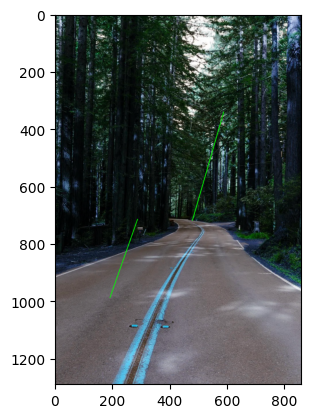

In [ ]:
clustered_lines = eliminator(final_lines,2)
draw_lines(cv2.imread(image_path,1),clustered_lines)

In [ ]:
clustered_lines


[[[287, 119, 482, 93]], [[331, 153, 484, 88]]]

In [ ]:
image_path = 'image3.jpg'

In [ ]:
image_path = 'image4.jpg'

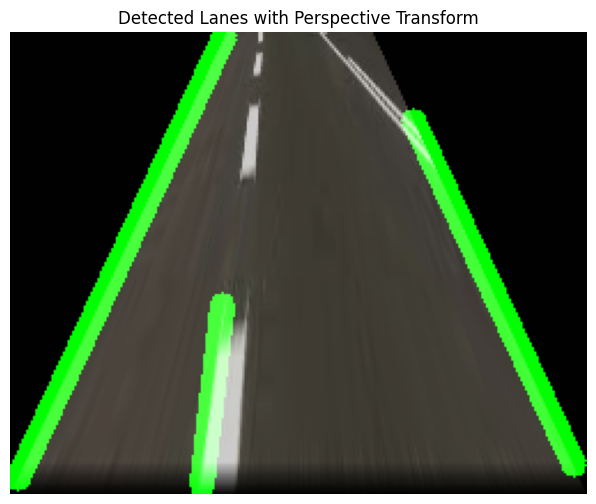

array([[[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[  1, 255,   1],
        [  8, 255,   9],
        [ 12, 255,  15],
        ...,
        [ 11,  12,  13],
        [  7,   8,   8],
        [  1,   1,   1]],

       [[  2,   2,   2],
        [  9,  10,  11],
        [  8,   9,  10],
        ...,
        [  7,   9,   9],
        [  7,   9,   9],
        [  2,   2,   2]],

       [[  3,   3,   3],
        [  5,   5,   6],
        [  5,   5,   6],
        ...,
        [  4,   5,   5],
        [  4,   5,   5],
        [  3,   3,   3]]], dtype=uint8)
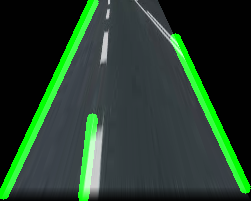

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def lane_detection_with_perspective(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found or invalid image path!")
        return None

    # Resize the image for consistency (optional)
    #image = cv2.resize(image, (960, 540))  # Resize to 960x540 for easier processing

    # Define points for perspective transform (adjust as needed for your image)
    height, width = image.shape[:2]
    src_points = np.float32([
        [width // 2 - 100, height // 2 + 50],  # Top-left
        [width // 2 + 100, height // 2 + 50],  # Top-right
        [width - 100, height],                # Bottom-right
        [100, height]                         # Bottom-left
    ])
    dst_points = np.float32([
        [100, 0],                     # Top-left
        [width - 100, 0],             # Top-right
        [width - 100, height],        # Bottom-right
        [100, height]                 # Bottom-left
    ])

    # Perform perspective transform
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    warped = cv2.warpPerspective(image, M, (width, height))

    # Convert the image to grayscale
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Perform Hough Line Transformation
    lines = cv2.HoughLinesP(edges, rho=2, theta=np.pi/180, threshold=100,
                            minLineLength=40, maxLineGap=5)

    # Create a blank image to draw lines on
    line_image = np.zeros_like(warped)

    # Draw the lines on the blank image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 10)

    # Combine the line image with the original warped image
    combined = cv2.addWeighted(warped, 0.8, line_image, 1, 1)

    # Show the final output
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Lanes with Perspective Transform")
    plt.show()

    return combined

# Example usage
image_path = "image2.jpeg"  # Replace this with your image path
lane_detection_with_perspective(image_path)
